In [1]:
from mingle.utilities.db_utils import SingleSimReader, DBExtractor, df_contour
import matplotlib.pyplot as plt
from bin.coadd_analysis_module import compare_spectra
from bin.coadd_bhm_analysis_module import compare_spectra as bhm_compare_spectra
%matplotlib inline


/home/jneal/anaconda3/envs/sims/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Example 6

A sun like star with a 4000K companion. (M-dwarf)

In [2]:
chi2_val = "chi2_123"

In [3]:
!cat Example6/Example6.sh 


cat: Example6/Example6.sh: No such file or directory


In [12]:
ex6_base ="/home/jneal/Phd/Analysis/Paper_examples/Example6_highres/analysis"
#  ="/home/jneal/Documents/data/Paper_examples/Example6/analysis"

correct6 = {"teff_1":5800, "logg_2": 4.5, "feh_1": 0.0, "gamma":-15,
           "teff_2": 4000, "logg_2": 5.0, "feh_2": 0.0,  "rv":20}

looking in  /home/jneal/Phd/Analysis/Paper_examples/Example6_highres/analysis/EXAMPLE6150RES/bhm for
 EXAMPLE6150RES**_coadd_bhm_chisqr_results.db
{'logg_1': 4.5, 'feh_1': 0.0}
(1144, 8)


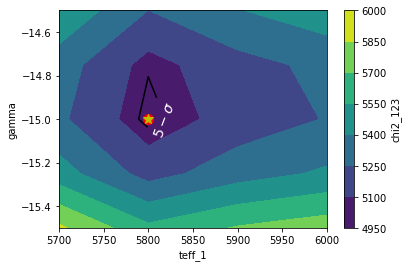

In [15]:
# EX 6 bhm recovery  on iam sim. snr=150
sim_example = SingleSimReader(base=ex6_base,
                       name="Example6150RES", mode="bhm", chi2_val=chi2_val)

extractor = DBExtractor(sim_example.get_table())

df_min = extractor.minimum_value_of(chi2_val)

cols = ['gamma',  chi2_val, 'teff_1','logg_1', 'feh_1']


fixed = {key: df_min[key].values[0] for key in ["logg_1", "feh_1"]}
print(fixed)
df = extractor.fixed_extraction(cols, fixed, limit=-1)
print(df.shape)
df.head()

df_contour(df, "teff_1", "gamma", chi2_val, df_min, [], correct=correct6, dof=2, xlim=[5700, 6000], ylim=[-15.5, -14.5])
plt.show()

looking in  /home/jneal/Phd/Analysis/Paper_examples/Example6_highres/analysis/EXAMPLE6150RES/iam for
 EXAMPLE6150RES**_coadd_iam_chisqr_results.db
{'logg_1': 4.5, 'logg_2': 5.0, 'feh_1': 0.0, 'feh_2': 0.0}
(2178176, 12)


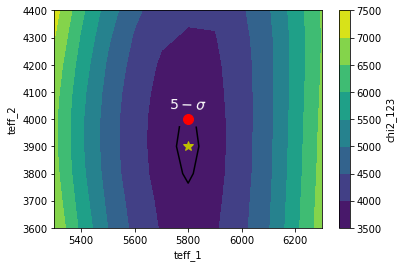

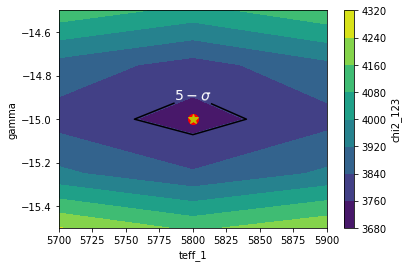

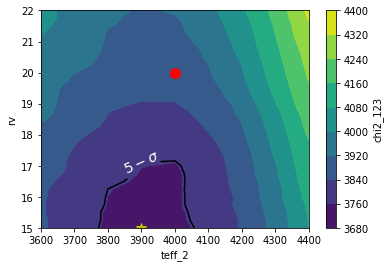

In [16]:
# EX 6 iam recovery on iam sim. sne=150
sim_example = SingleSimReader(base=ex6_base,
                       name="Example6150RES", mode="iam", chi2_val=chi2_val)

extractor = DBExtractor(sim_example.get_table())

df_min = extractor.minimum_value_of(chi2_val)

cols = ['teff_2', 'logg_2', 'feh_2', 'rv', 'gamma',
        chi2_val, 'teff_1','logg_1', 'feh_1']


fixed = {key: df_min[key].values[0] for key in ["logg_1", "logg_2", "feh_1", "feh_2"]}
print(fixed)
df = extractor.fixed_extraction(cols, fixed, limit=-1)
print(df.shape)
df.head()

df_contour(df, "teff_1", "teff_2", chi2_val, df_min, ["gamma", "rv"], correct=correct6, dof=4, ylim=[3600, 4400])
plt.show()
df_contour(df, "teff_1", "gamma", chi2_val, df_min, ["teff_2", "rv"], correct=correct6, dof=4, xlim=[5700, 5900], ylim=[-15.5, -14.5])
plt.show()
df_contour(df, "teff_2", "rv", chi2_val, df_min, ["gamma", "teff_1"], correct=correct6, dof=4, xlim=[3600, 4400], ylim=[15, 22])